In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# import plotly.io as pio

# # Option A: default to PNG output
# pio.renderers.default = "png"

# Option B: (if you prefer vector/SVG)
# pio.renderers.default = "svg"


In [3]:
# pip install -U kaleido

In [4]:

df = pd.read_csv("Tetuan City power consumption.csv")  
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

In [5]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [6]:
from auto_ts_analysis import run_full_analysis

In [7]:
import eda_tools as eda

In [8]:
df.head()

DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0  1/1/2017 0:00        6.559      73.8       0.083                  0.051   
1  1/1/2017 0:10        6.414      74.5       0.083                  0.070   
2  1/1/2017 0:20        6.313      74.5       0.080                  0.062   
3  1/1/2017 0:30        6.121      75.0       0.083                  0.091   
4  1/1/2017 0:40        5.921      75.7       0.081                  0.048   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119               34055.69620                16128.87538   
1          0.085               29814.68354                19375.07599   
2          0.100               29128.10127                19006.68693   
3          0.096               28228.86076                18361.09422   
4          0.085               27335.69620                17872.34043   

   Zone 3  Power Consumption  
0                20240.96386  
1                20131.08434  
2                19668.43373  
3                18899.27711  
4                18442.40964

In [9]:
df=eda.set_datetime_index(df=df,datetime_col='DateTime',infer_format=True)

c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\eda_tools.py:63: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[datetime_col] = pd.to_datetime(


In [10]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                                   
2017-01-01 00:00:00                16128.87538                20240.96386  
2017-01-01 00:10:00                19375.07599                20131.08434  
2017-01-01 00:20:00                19006.68693                19668.43373  
2017-01-01 00:30:00                18361.09422                18899.27711  
2017-01-01 00:40:00                17872.34043                18442.40964

In [11]:
df_hourly=eda.aggregate_time_series(df,freq='H',how='sum')

c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\eda_tools.py:564: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aggregated = getattr(numeric_df.resample(freq), how)()


In [12]:
df_hourly.reset_index(inplace=True)

In [13]:
df_hourly.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [14]:
eda.clean_column_names(df_hourly)

In [15]:
# results = run_full_analysis(
#     df=df_daily,
#     datetime_col="DateTime",                  # Replace with your actual timestamp column name
#     target_cols=['Zone 1 Power Consumption',
#        'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],         # Replace with your actual consumption columns
      
#     decomposition_period=7,    # e.g. use 7 if data is daily and you expect weekly seasonality
#     adf_regression="c",        # ADF regression option
#     kpss_regression="c",       # KPSS regression option
#     output_dir="eda_outputs"   # All plots/CSVs will be saved under ./eda_outputs/
# )

In [16]:
# df_daily.head()

In [17]:
import eda_tools as eda

In [18]:
# df_hourly = eda.get_hourly_aggregation(df, how='sum')

In [19]:
df_hourly.head()

DateTime  Temperature  Humidity  Wind Speed  \
0 2017-01-01 00:00:00       37.181     450.4       0.491   
1 2017-01-01 01:00:00       33.293     465.5       0.492   
2 2017-01-01 02:00:00       30.326     473.6       0.494   
3 2017-01-01 03:00:00       30.026     462.5       0.497   
4 2017-01-01 04:00:00       30.586     444.3       0.494   

   general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                  0.381          0.593              175187.84810   
1                  0.341          0.675              147943.29114   
2                  0.378          0.775              132498.22784   
3                  0.359          0.846              124866.83544   
4                  0.348          0.737              122855.69620   

   Zone 2 Power Consumption  Zone 3 Power Consumption  
0              108160.48632              115512.28916  
1               96470.51672              102257.34940  
2               85984.19453               94056.86747  
3               79316.71732               89303.13253  
4               77529.48328               85902.65060

In [20]:
eda.clean_column_names(df_hourly)

In [21]:
eda.get_correlation_matrix(df_hourly)

Temperature  Humidity  Wind Speed  \
Temperature                  1.000000 -0.459387    0.479446   
Humidity                    -0.459387  1.000000   -0.136835   
Wind Speed                   0.479446 -0.136835    1.000000   
general diffuse flows        0.464366 -0.473566    0.136046   
diffuse flows                0.202537 -0.266270   -0.001090   
Zone 1 Power Consumption     0.443863 -0.290764    0.169573   
Zone 2 Power Consumption     0.384833 -0.297885    0.147999   
Zone 3 Power Consumption     0.492124 -0.235100    0.280995   

                          general diffuse flows  diffuse flows  \
Temperature                            0.464366       0.202537   
Humidity                              -0.473566      -0.266270   
Wind Speed                             0.136046      -0.001090   
general diffuse flows                  1.000000       0.576290   
diffuse flows                          0.576290       1.000000   
Zone 1 Power Consumption               0.191831       0.087430   
Zone 2 Power Consumption               0.159858       0.049046   
Zone 3 Power Consumption               0.064914      -0.037074   

                          Zone 1 Power Consumption  Zone 2 Power Consumption  \
Temperature                               0.443863                  0.384833   
Humidity                                 -0.290764                 -0.297885   
Wind Speed                                0.169573                  0.147999   
general diffuse flows                     0.191831                  0.159858   
diffuse flows                             0.087430                  0.049046   
Zone 1 Power Consumption                  1.000000                  0.834165   
Zone 2 Power Consumption                  0.834165                  1.000000   
Zone 3 Power Consumption                  0.750057                  0.568448   

                          Zone 3 Power Consumption  
Temperature                               0.492124  
Humidity                                 -0.235100  
Wind Speed                                0.280995  
general diffuse flows                     0.064914  
diffuse flows                            -0.037074  
Zone 1 Power Consumption                  0.750057  
Zone 2 Power Consumption                  0.568448  
Zone 3 Power Consumption                  1.000000

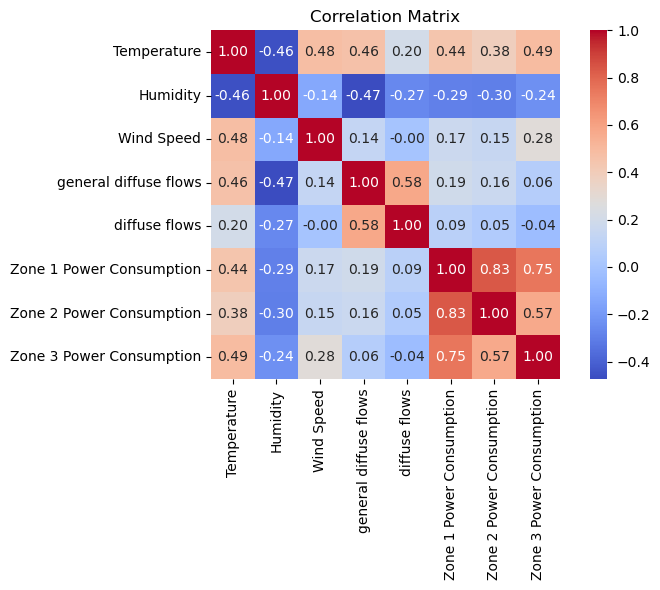

In [22]:
eda.plot_correlation_heatmap(
    df_hourly)

In [23]:
eda.aggregate_time_series(
    df,
    freq='H',
    how='sum'
)

c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\eda_tools.py:564: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  aggregated = getattr(numeric_df.resample(freq), how)()


Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00       37.181    450.40       0.491                  0.381   
2017-01-01 01:00:00       33.293    465.50       0.492                  0.341   
2017-01-01 02:00:00       30.326    473.60       0.494                  0.378   
2017-01-01 03:00:00       30.026    462.50       0.497                  0.359   
2017-01-01 04:00:00       30.586    444.30       0.494                  0.348   
...                          ...       ...         ...                    ...   
2017-12-30 19:00:00       56.720    374.44       0.448                  0.312   
2017-12-30 20:00:00       54.250    383.94       0.482                  0.316   
2017-12-30 21:00:00       48.070    418.05       0.489                  0.439   
2017-12-30 22:00:00       45.590    421.89       0.491                  0.352   
2017-12-30 23:00:00       41.265    437.40       0.489                  0.362   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.593              175187.84810   
2017-01-01 01:00:00          0.675              147943.29114   
2017-01-01 02:00:00          0.775              132498.22784   
2017-01-01 03:00:00          0.846              124866.83544   
2017-01-01 04:00:00          0.737              122855.69620   
...                            ...                       ...   
2017-12-30 19:00:00          0.612              225082.88974   
2017-12-30 20:00:00          0.630              222053.23193   
2017-12-30 21:00:00          0.590              212149.04943   
2017-12-30 22:00:00          0.649              203960.45628   
2017-12-30 23:00:00          0.556              180647.90873   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                                   
2017-01-01 00:00:00               108160.48632               115512.28916  
2017-01-01 01:00:00                96470.51672               102257.34940  
2017-01-01 02:00:00                85984.19453                94056.86747  
2017-01-01 03:00:00                79316.71732                89303.13253  
2017-01-01 04:00:00                77529.48328                85902.65060  
...                                        ...                        ...  
2017-12-30 19:00:00               194986.19208               101560.62425  
2017-12-30 20:00:00               192121.50966               101992.79712  
2017-12-30 21:00:00               184547.40718                99653.30132  
2017-12-30 22:00:00               170864.68242                93689.31573  
2017-12-30 23:00:00               154280.45413                84861.46457  

[8736 rows x 8 columns]

In [24]:
df.head()

Temperature  Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                        
2017-01-01 00:00:00        6.559      73.8       0.083                  0.051   
2017-01-01 00:10:00        6.414      74.5       0.083                  0.070   
2017-01-01 00:20:00        6.313      74.5       0.080                  0.062   
2017-01-01 00:30:00        6.121      75.0       0.083                  0.091   
2017-01-01 00:40:00        5.921      75.7       0.081                  0.048   

                     diffuse flows  Zone 1 Power Consumption  \
DateTime                                                       
2017-01-01 00:00:00          0.119               34055.69620   
2017-01-01 00:10:00          0.085               29814.68354   
2017-01-01 00:20:00          0.100               29128.10127   
2017-01-01 00:30:00          0.096               28228.86076   
2017-01-01 00:40:00          0.085               27335.69620   

                     Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                                   
2017-01-01 00:00:00                16128.87538                20240.96386  
2017-01-01 00:10:00                19375.07599                20131.08434  
2017-01-01 00:20:00                19006.68693                19668.43373  
2017-01-01 00:30:00                18361.09422                18899.27711  
2017-01-01 00:40:00                17872.34043                18442.40964

In [25]:
df_hourly.head(10)

DateTime  Temperature  Humidity  Wind Speed  \
0 2017-01-01 00:00:00       37.181     450.4       0.491   
1 2017-01-01 01:00:00       33.293     465.5       0.492   
2 2017-01-01 02:00:00       30.326     473.6       0.494   
3 2017-01-01 03:00:00       30.026     462.5       0.497   
4 2017-01-01 04:00:00       30.586     444.3       0.494   
5 2017-01-01 05:00:00       28.450     451.4       0.486   
6 2017-01-01 06:00:00       27.430     454.5       0.493   
7 2017-01-01 07:00:00       26.723     440.4       0.496   
8 2017-01-01 08:00:00       27.931     441.6       0.496   
9 2017-01-01 09:00:00       27.655     443.9       0.493   

   general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                  0.381          0.593              175187.84810   
1                  0.341          0.675              147943.29114   
2                  0.378          0.775              132498.22784   
3                  0.359          0.846              124866.83544   
4                  0.348          0.737              122855.69620   
5                  0.395          0.713              124842.53164   
6                  0.370          0.753              129891.64557   
7                  0.393          0.717              111244.55697   
8                 82.583         37.852              117630.37974   
9                868.800        151.290              137431.89873   

   Zone 2 Power Consumption  Zone 3 Power Consumption  
0              108160.48632              115512.28916  
1               96470.51672              102257.34940  
2               85984.19453               94056.86747  
3               79316.71732               89303.13253  
4               77529.48328               85902.65060  
5               78419.45289               86371.08433  
6               81578.11551               87082.40963  
7               68699.08814               69316.62651  
8               70431.61093               67142.16868  
9               82887.53800               78159.03614

In [26]:
# eda.plot_boxplots(
#     df_hourly,
# )

In [27]:
# eda.plot_pairplot(
#     df_hourly,columns=['Zone 1 Power Consumption',
#        'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],diag_kind='kde')

In [28]:
import tests as tst

In [29]:
# tst.test_stationarity(
#     df_hourly,column='Zone 1 Power Consumption',
#     freq='D',
#     window=7)

In [30]:
import auto_ts_analysis as ata

In [31]:
# ata.run_full_analysis(
#     df=df_hourly.reset_index(),
#     datetime_col="DateTime",                  # Replace with your actual timestamp column name
#     target_cols=['Zone 1 Power Consumption',
#        'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
#     decomposition_period=168,    # e.g. use 7 if data is daily and you expect weekly seasonality
#     adf_regression="c",        # ADF regression option
#     kpss_regression="c",       # KPSS regression option
# )

In [32]:
import auto_ts_analysis as ata

In [33]:
# ata.run_full_analysis(
#     df=df_hourly.reset_index(),
#     datetime_col="DateTime",                  # Replace with your actual timestamp column name
#     target_cols=['Zone 1 Power Consumption',
#        'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
#     decomposition_period=168,    # e.g. use 7 if data is daily and you expect weekly seasonality
#     adf_regression="c",        # ADF regression option
#     kpss_regression="c",       # KPSS regression option
# )

In [34]:
# df_daily=eda.aggregate_time_series(
#     df,
#     freq='D',
#     how='sum'
#     )


In [35]:
df_hourly.head()

DateTime  Temperature  Humidity  Wind Speed  \
0 2017-01-01 00:00:00       37.181     450.4       0.491   
1 2017-01-01 01:00:00       33.293     465.5       0.492   
2 2017-01-01 02:00:00       30.326     473.6       0.494   
3 2017-01-01 03:00:00       30.026     462.5       0.497   
4 2017-01-01 04:00:00       30.586     444.3       0.494   

   general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                  0.381          0.593              175187.84810   
1                  0.341          0.675              147943.29114   
2                  0.378          0.775              132498.22784   
3                  0.359          0.846              124866.83544   
4                  0.348          0.737              122855.69620   

   Zone 2 Power Consumption  Zone 3 Power Consumption  
0              108160.48632              115512.28916  
1               96470.51672              102257.34940  
2               85984.19453               94056.86747  
3               79316.71732               89303.13253  
4               77529.48328               85902.65060

In [36]:
import season as sea

In [37]:
df_daily = eda.aggregate_time_series(df, freq='D', how='mean')

In [38]:
# sea.plotly_overlay_seasonality(
#     series=df_daily['Zone 1 Power Consumption'],
#     block_length=7,  # 7 days
#     title="Zone 1 Power Consumption - Daily Seasonality",
# )

In [39]:
# sea.plotly_detrended_seasonality(
#     series=df_daily['Zone 1 Power Consumption'],
#     block_length=7,  # 7 days
#     title="Zone 1 Power Consumption - Daily Detrended Seasonality",
# )

In [40]:
# sea.plotly_average_seasonality(
#     series=df_daily['Zone 1 Power Consumption'],
#     block_length=7,  # 7 days
#     title="Zone 1 Power Consumption - Daily Average Seasonality",
# )

In [41]:
# tst.plot_seasonal_decompose(
#     df_hourly,
#     column='Zone 1 Power Consumption',
#     model='additive',
#     period=24)


In [42]:
# tst.plot_acf_pacf(
#     df_hourly,
#     column='Zone 1 Power Consumption',
#     lags=168,
    
# )


In [43]:
# df_hourly.set_index('DateTime', inplace=True)

In [44]:
# tst.plotly_overlay_seasonality(
#     series=df_hourly['Zone 1 Power Consumption'],
#     block_length=24,
#    title='Seasonal Decomposition of Zone 1 Power Consumption',

# )


In [45]:
import auto_ts_analysis as ata

In [46]:
df_hourly.head()

DateTime  Temperature  Humidity  Wind Speed  \
0 2017-01-01 00:00:00       37.181     450.4       0.491   
1 2017-01-01 01:00:00       33.293     465.5       0.492   
2 2017-01-01 02:00:00       30.326     473.6       0.494   
3 2017-01-01 03:00:00       30.026     462.5       0.497   
4 2017-01-01 04:00:00       30.586     444.3       0.494   

   general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                  0.381          0.593              175187.84810   
1                  0.341          0.675              147943.29114   
2                  0.378          0.775              132498.22784   
3                  0.359          0.846              124866.83544   
4                  0.348          0.737              122855.69620   

   Zone 2 Power Consumption  Zone 3 Power Consumption  
0              108160.48632              115512.28916  
1               96470.51672              102257.34940  
2               85984.19453               94056.86747  
3               79316.71732               89303.13253  
4               77529.48328               85902.65060

In [50]:
df_daily.head()

Temperature   Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                
2017-01-01     9.675299  68.519306    0.315146             121.390771   
2017-01-02    12.476875  71.456319    0.076563             120.404486   
2017-01-03    12.100000  74.981667    0.076715             120.686014   
2017-01-04    10.509479  75.459792    0.082417             122.959319   
2017-01-05    10.866444  71.040486    0.083896             118.749861   

            diffuse flows  Zone 1 Power Consumption  \
DateTime                                              
2017-01-01      25.993924              28465.232067   
2017-01-02      27.227410              28869.493671   
2017-01-03      28.574660              30562.447257   
2017-01-04      28.827222              30689.831224   
2017-01-05      29.741437              30802.911393   

            Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                          
2017-01-01               17737.791287               17868.795181  
2017-01-02               19557.725431               17820.763053  
2017-01-03               20057.269504               17620.803213  
2017-01-04               20102.077001               17673.694779  
2017-01-05               20033.941237               17664.176707

In [52]:
eda.clean_column_names(df_daily)


========= Plotting Raw Time Series for 'Zone 1 Power Consumption' =========


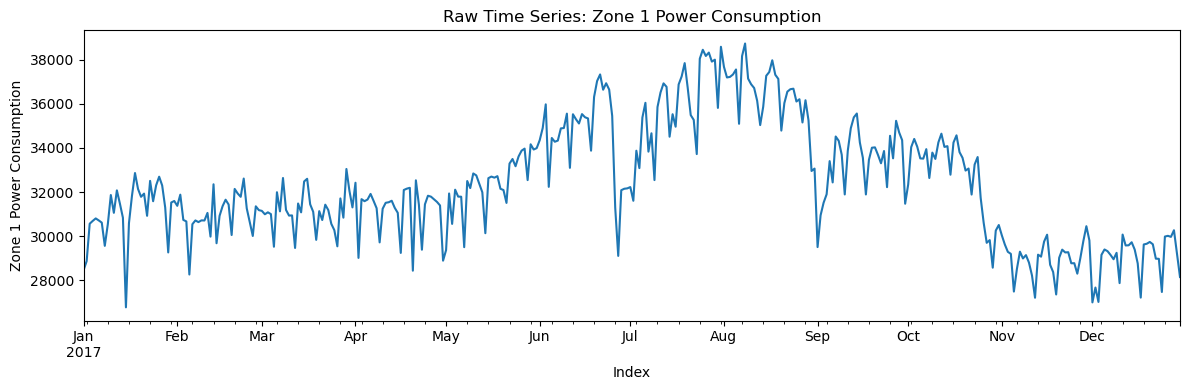


--- Classical Seasonal Decomposition for 'Zone 1 Power Consumption' (period=7) ---


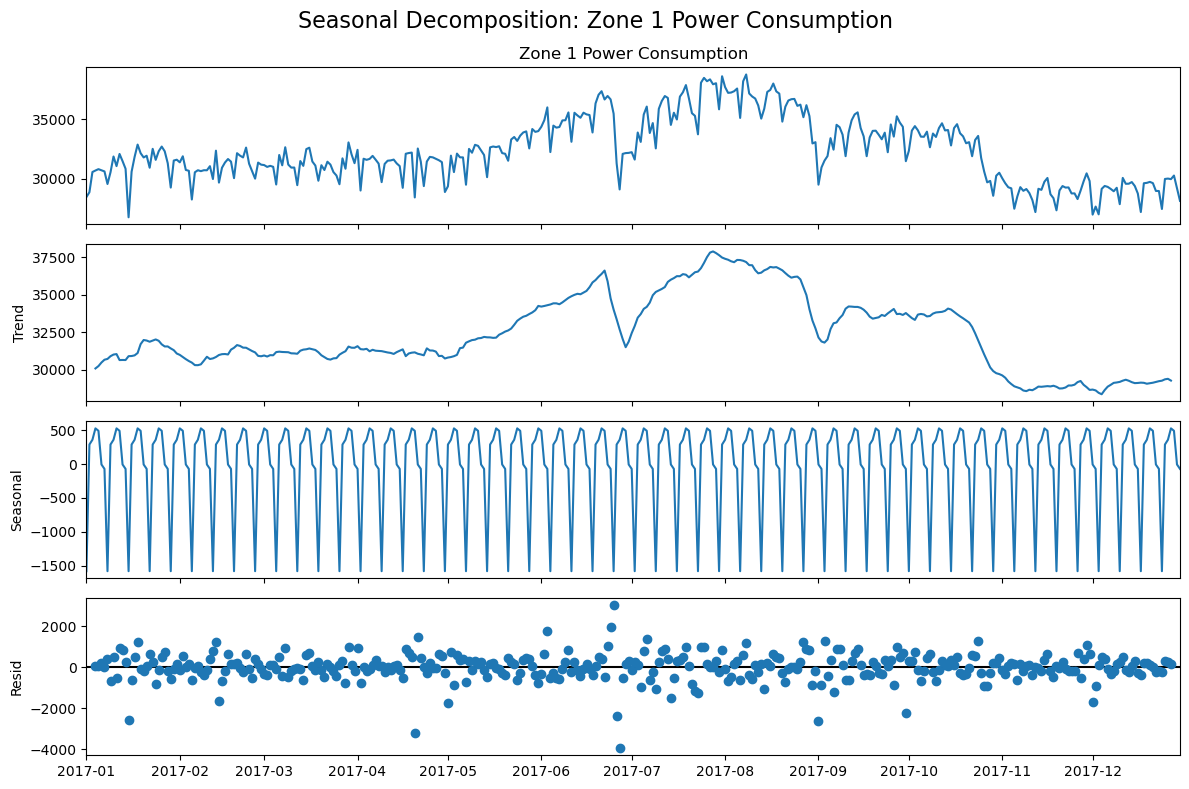


--- Stationarity Tests for 'Zone 1 Power Consumption' ---


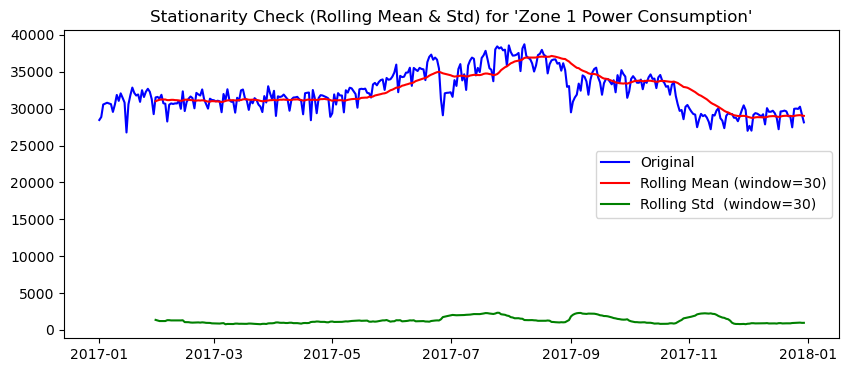

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -1.559147
p-value         : 0.504076
Used lag        : 14
Number of obs   : 349
Critical Values :
    1%: -3.449
    5%: -2.870
    10%: -2.571
=> ADF p-value >= 0.05 → fail to reject null. 'Zone 1 Power Consumption' may be non-stationary by ADF.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 0.591990
p-value         : 0.023365
Used lags       : 11
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 1 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
Both ADF and KPSS agree: 'Zone 1 Power Consumption' is non-stationary. Consider differencing or detrending.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 1 Power Consumption' ---


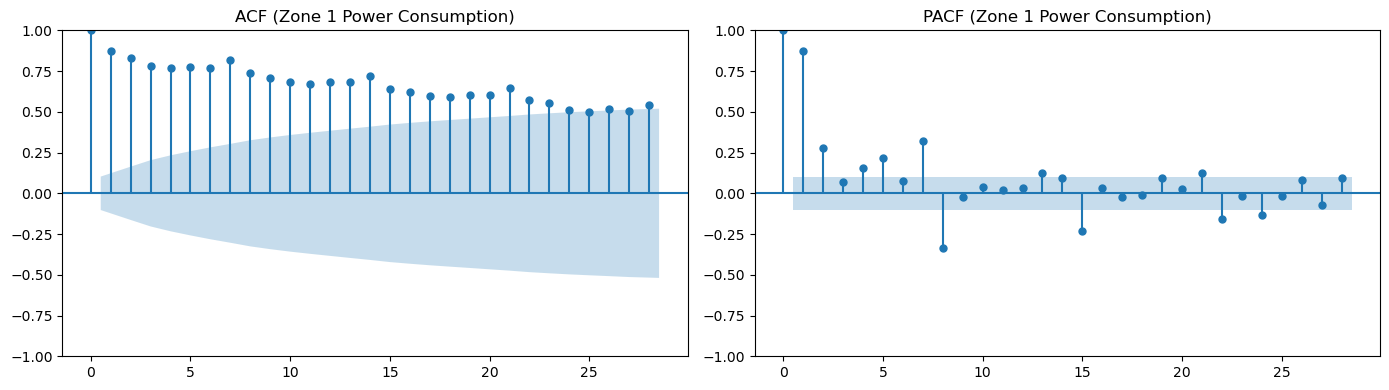


--- Summary Statistics for 'Zone 1 Power Consumption' ---
count      364.000000
mean     32344.970564
std       2669.367965
min      26771.518987
25%      30531.185497
50%      31920.994445
75%      34100.775705
max      38733.496116
Name: Zone 1 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 1 Power Consumption' (block_length=7) ---



--- Plotly Average Seasonality for 'Zone 1 Power Consumption' (block_length=7) ---



--- Plotly Detrended Seasonality for 'Zone 1 Power Consumption' (block_length=7) ---



========= Plotting Raw Time Series for 'Zone 2 Power Consumption' =========


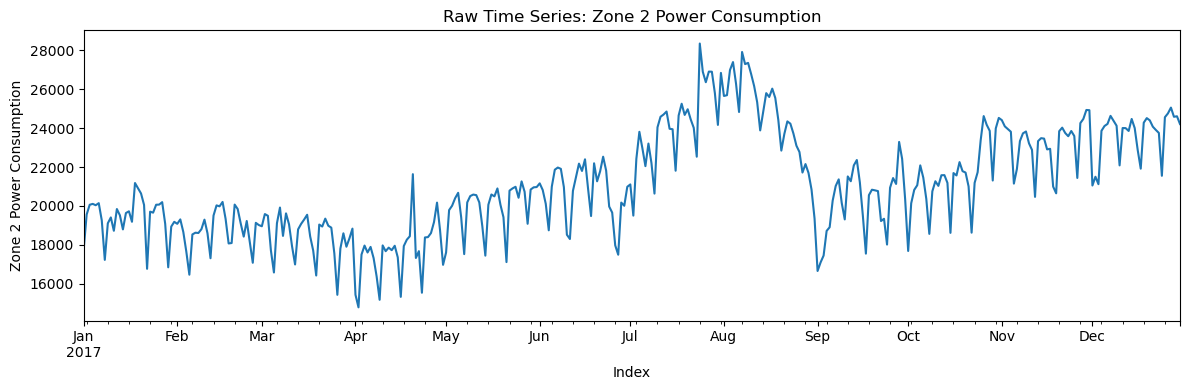


--- Classical Seasonal Decomposition for 'Zone 2 Power Consumption' (period=7) ---


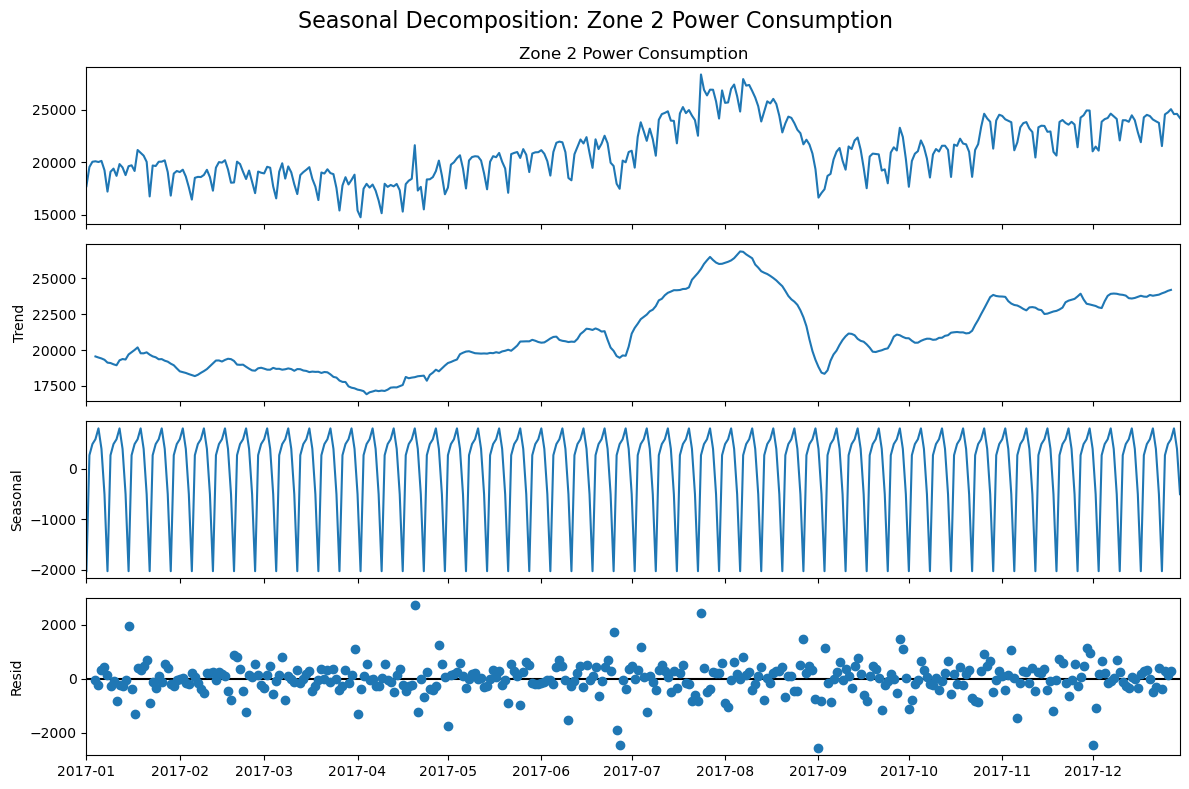


--- Stationarity Tests for 'Zone 2 Power Consumption' ---


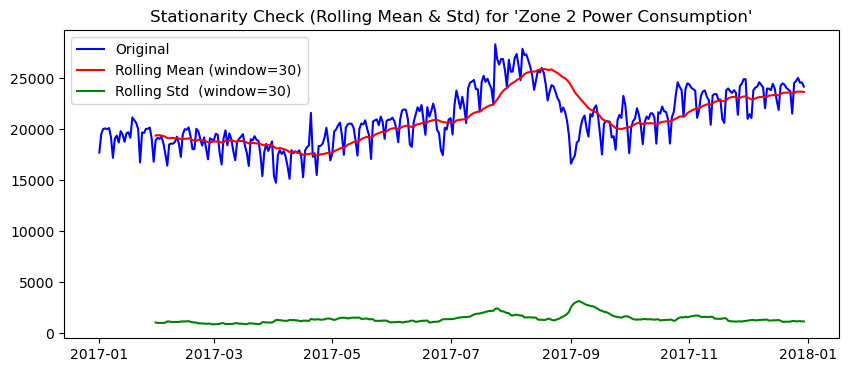

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -1.525507
p-value         : 0.520858
Used lag        : 15
Number of obs   : 348
Critical Values :
    1%: -3.449
    5%: -2.870
    10%: -2.571
=> ADF p-value >= 0.05 → fail to reject null. 'Zone 2 Power Consumption' may be non-stationary by ADF.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 1.662447
p-value         : 0.010000
Used lags       : 11
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 2 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
Both ADF and KPSS agree: 'Zone 2 Power Consumption' is non-stationary. Consider differencing or detrending.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 2 Power Consumption' ---


c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\tests.py:222: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




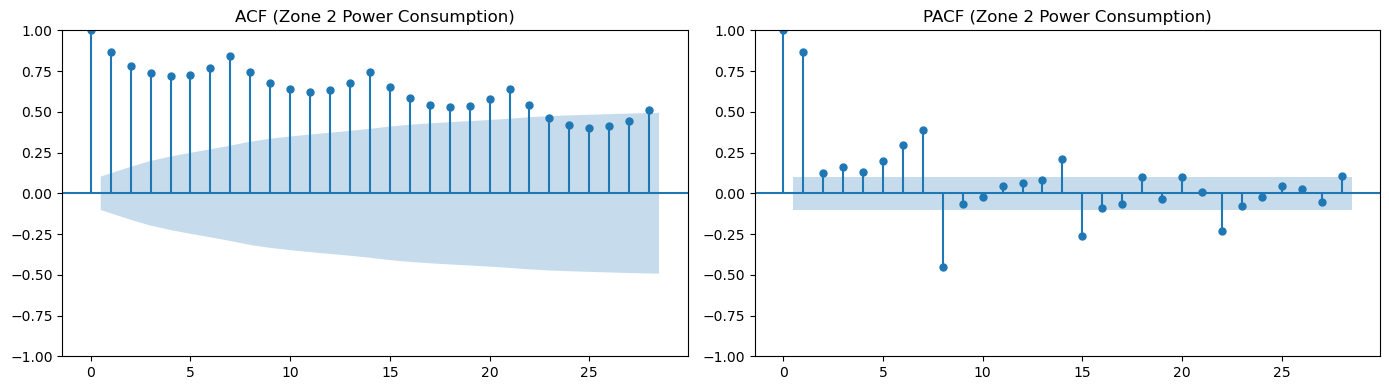


--- Summary Statistics for 'Zone 2 Power Consumption' ---
count      364.000000
mean     21042.509082
std       2708.561013
min      14779.098778
25%      19046.519309
50%      20807.354470
75%      23344.342106
max      28354.535865
Name: Zone 2 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 2 Power Consumption' (block_length=7) ---



--- Plotly Average Seasonality for 'Zone 2 Power Consumption' (block_length=7) ---



--- Plotly Detrended Seasonality for 'Zone 2 Power Consumption' (block_length=7) ---



========= Plotting Raw Time Series for 'Zone 3 Power Consumption' =========


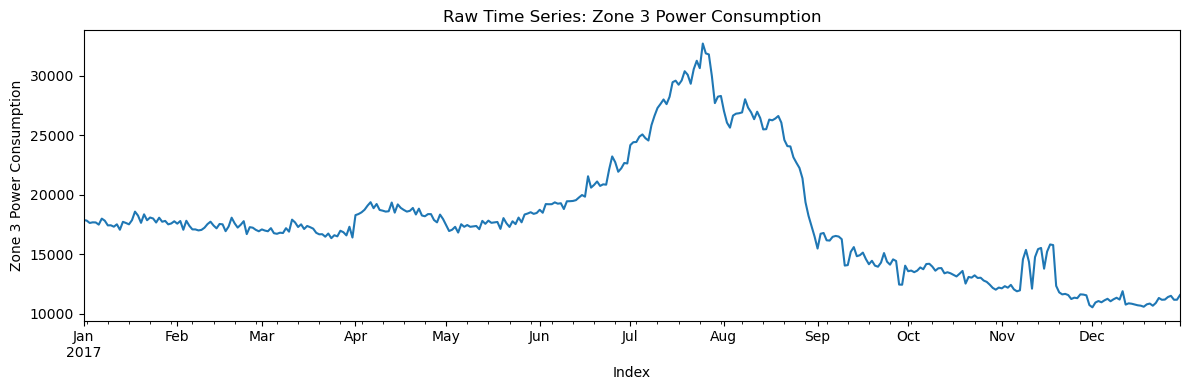


--- Classical Seasonal Decomposition for 'Zone 3 Power Consumption' (period=7) ---


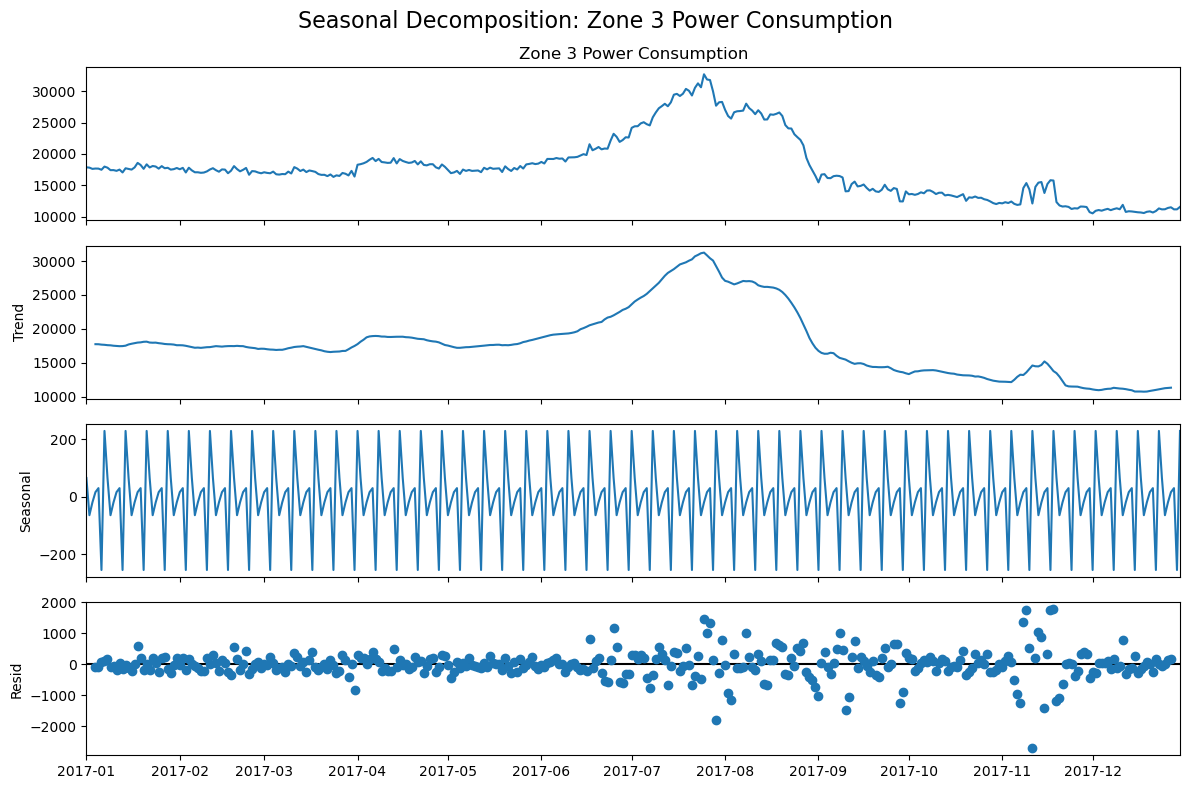


--- Stationarity Tests for 'Zone 3 Power Consumption' ---


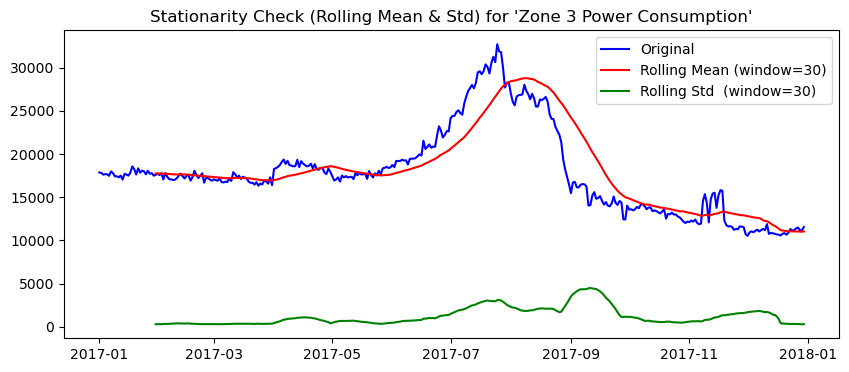

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -1.499794
p-value         : 0.533613
Used lag        : 16
Number of obs   : 347
Critical Values :
    1%: -3.449
    5%: -2.870
    10%: -2.571
=> ADF p-value >= 0.05 → fail to reject null. 'Zone 3 Power Consumption' may be non-stationary by ADF.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 0.737212
p-value         : 0.010163
Used lags       : 11
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 3 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
Both ADF and KPSS agree: 'Zone 3 Power Consumption' is non-stationary. Consider differencing or detrending.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 3 Power Consumption' ---


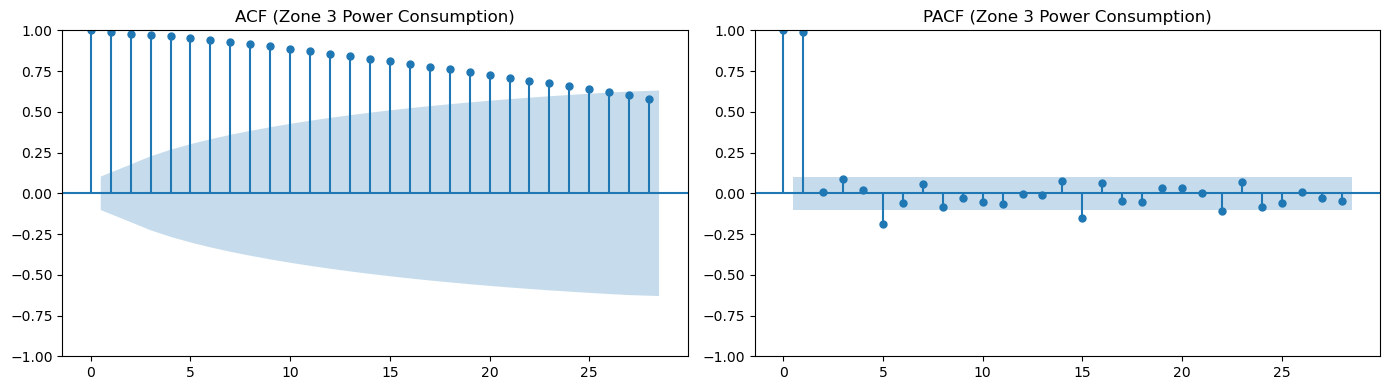


--- Summary Statistics for 'Zone 3 Power Consumption' ---
count      364.000000
mean     17835.406218
std       4904.520670
min      10530.612245
25%      14265.348116
50%      17421.566265
75%      18933.353535
max      32700.209205
Name: Zone 3 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 3 Power Consumption' (block_length=7) ---



--- Plotly Average Seasonality for 'Zone 3 Power Consumption' (block_length=7) ---



--- Plotly Detrended Seasonality for 'Zone 3 Power Consumption' (block_length=7) ---


{'Zone 1 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b8a63bea80>,
  'adf': None,
  'kpss': None,
  'summary': count      364.000000
  mean     32344.970564
  std       2669.367965
  min      26771.518987
  25%      30531.185497
  50%      31920.994445
  75%      34100.775705
  max      38733.496116
  Name: Zone 1 Power Consumption, dtype: float64},
 'Zone 2 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b89b9c1160>,
  'adf': None,
  'kpss': None,
  'summary': count      364.000000
  mean     21042.509082
  std       2708.561013
  min      14779.098778
  25%      19046.519309
  50%      20807.354470
  75%      23344.342106
  max      28354.535865
  Name: Zone 2 Power Consumption, dtype: float64},
 'Zone 3 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b89bbc0cb0>,
  'adf': None,
  'kpss': None,
  'summary': count      364.000000
  mean     17835.406218
  std       4904

In [54]:
ata.run_full_analysis(
    df=df_daily.reset_index(),
    datetime_col="DateTime",                  # Replace with your actual timestamp column name
    target_cols=['Zone 1 Power Consumption',
       'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
    decomposition_period=7,    # e.g. use 7 if data is daily and you expect weekly seasonality
    adf_regression="c",        # ADF regression option
    kpss_regression="c",       # KPSS regression option
)


========= Plotting Raw Time Series for 'Zone 1 Power Consumption' =========


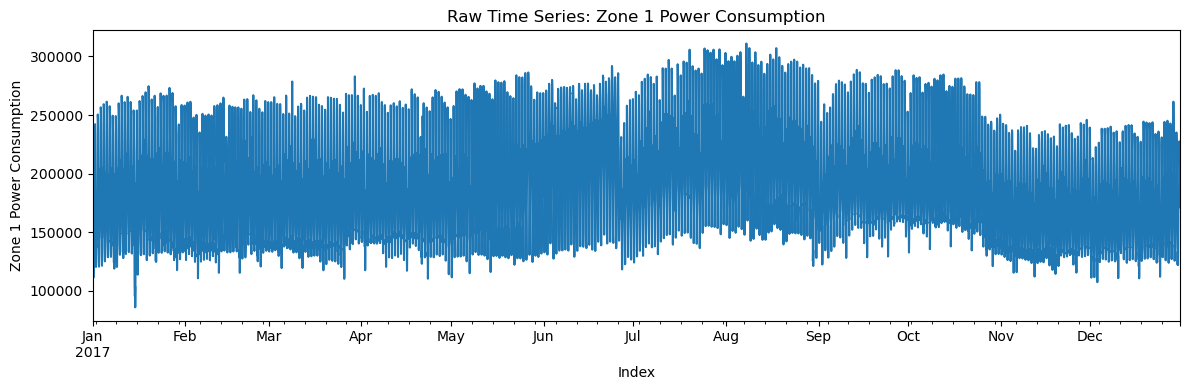


--- Classical Seasonal Decomposition for 'Zone 1 Power Consumption' (period=168) ---


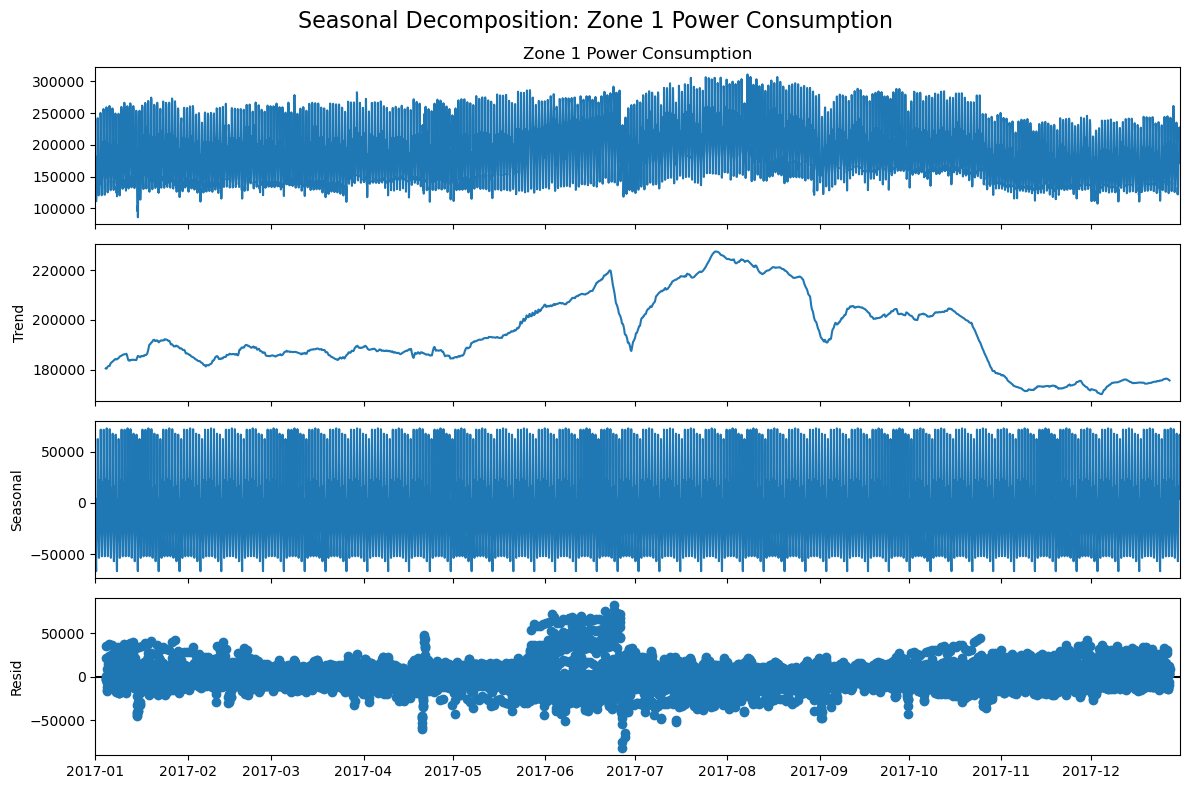


--- Stationarity Tests for 'Zone 1 Power Consumption' ---


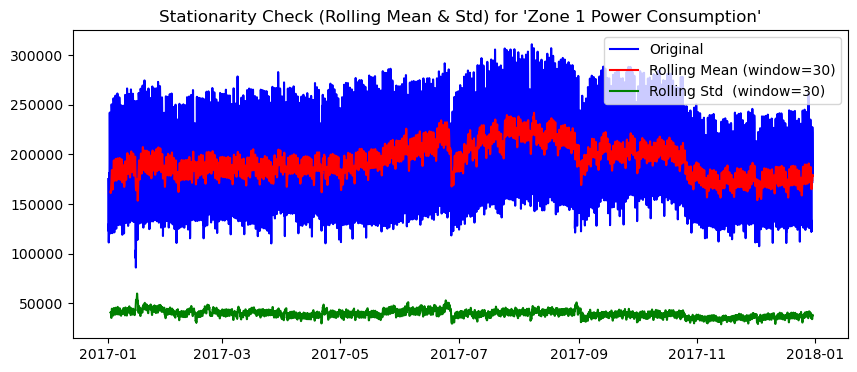

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -4.445856
p-value         : 0.000246
Used lag        : 37
Number of obs   : 8698
Critical Values :
    1%: -3.431
    5%: -2.862
    10%: -2.567
=> ADF p-value < 0.05 → reject null. 'Zone 1 Power Consumption' is stationary by ADF test.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 3.388627
p-value         : 0.010000
Used lags       : 34
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 1 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
ADF says stationary but KPSS says non-stationary: borderline. You may want to difference or investigate further.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 1 Power Consumption' ---


c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\tests.py:222: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_pvalue, kpss_lags, kpss_crit_vals = kpss(


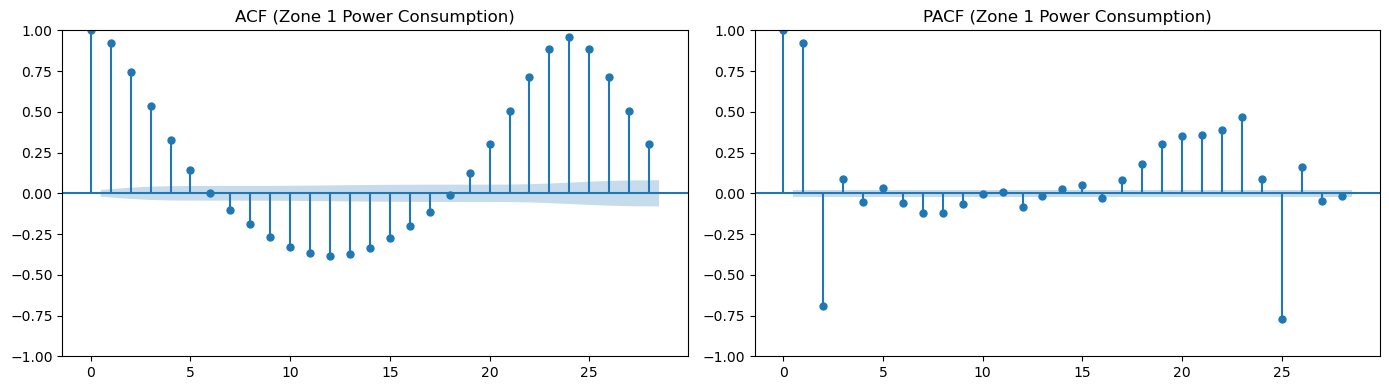


--- Summary Statistics for 'Zone 1 Power Consumption' ---
count      8736.000000
mean     194069.823382
std       42413.519258
min       85974.683540
25%      157757.710383
50%      194053.820085
75%      223908.013310
max      311065.571590
Name: Zone 1 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 1 Power Consumption' (block_length=168) ---



--- Plotly Average Seasonality for 'Zone 1 Power Consumption' (block_length=168) ---



--- Plotly Detrended Seasonality for 'Zone 1 Power Consumption' (block_length=168) ---



========= Plotting Raw Time Series for 'Zone 2 Power Consumption' =========


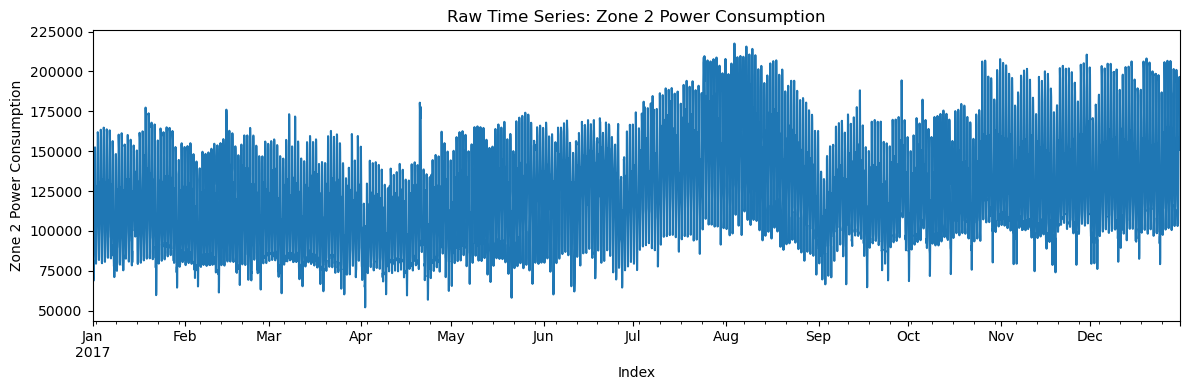


--- Classical Seasonal Decomposition for 'Zone 2 Power Consumption' (period=168) ---


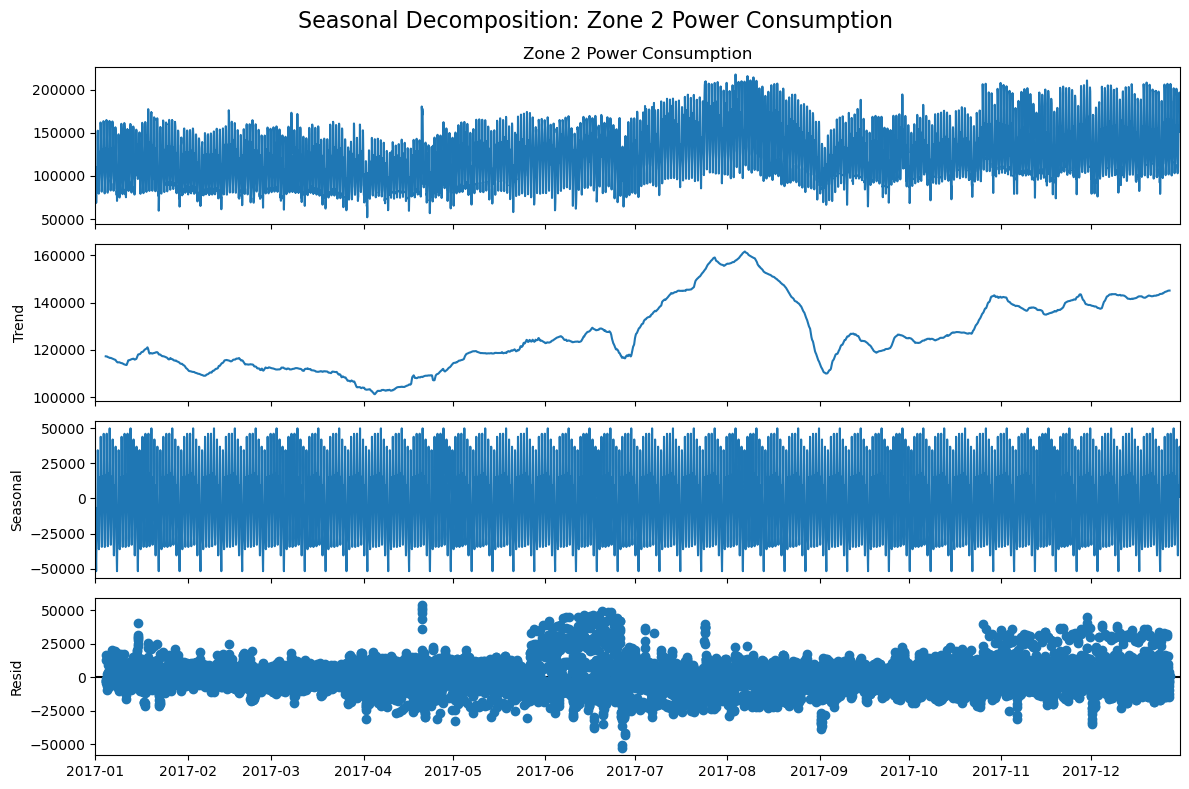


--- Stationarity Tests for 'Zone 2 Power Consumption' ---


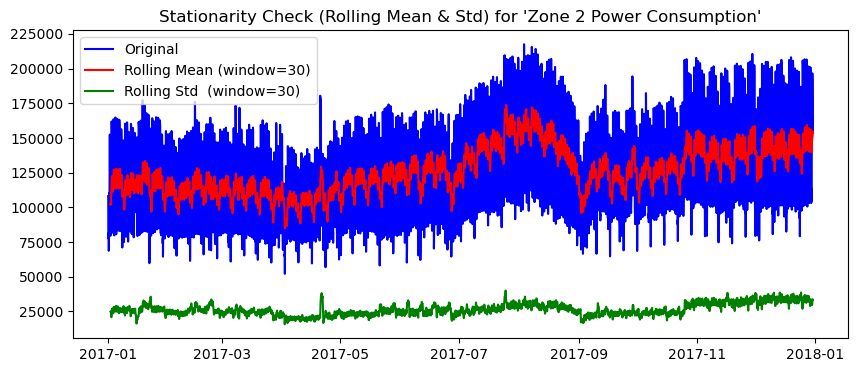

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -4.685282
p-value         : 0.000090
Used lag        : 37
Number of obs   : 8698
Critical Values :
    1%: -3.431
    5%: -2.862
    10%: -2.567
=> ADF p-value < 0.05 → reject null. 'Zone 2 Power Consumption' is stationary by ADF test.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 9.239851
p-value         : 0.010000
Used lags       : 41
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 2 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
ADF says stationary but KPSS says non-stationary: borderline. You may want to difference or investigate further.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 2 Power Consumption' ---


c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\tests.py:222: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




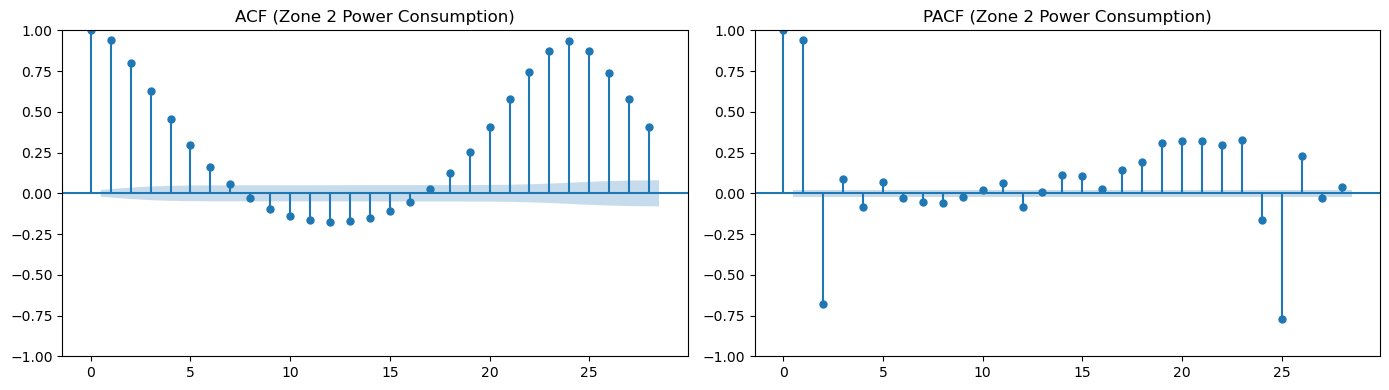


--- Summary Statistics for 'Zone 2 Power Consumption' ---
count      8736.000000
mean     126255.054494
std       30991.069215
min       52115.682281
25%      102101.410295
50%      124723.376960
75%      148065.654115
max      217528.194300
Name: Zone 2 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 2 Power Consumption' (block_length=168) ---



--- Plotly Average Seasonality for 'Zone 2 Power Consumption' (block_length=168) ---



--- Plotly Detrended Seasonality for 'Zone 2 Power Consumption' (block_length=168) ---



========= Plotting Raw Time Series for 'Zone 3 Power Consumption' =========


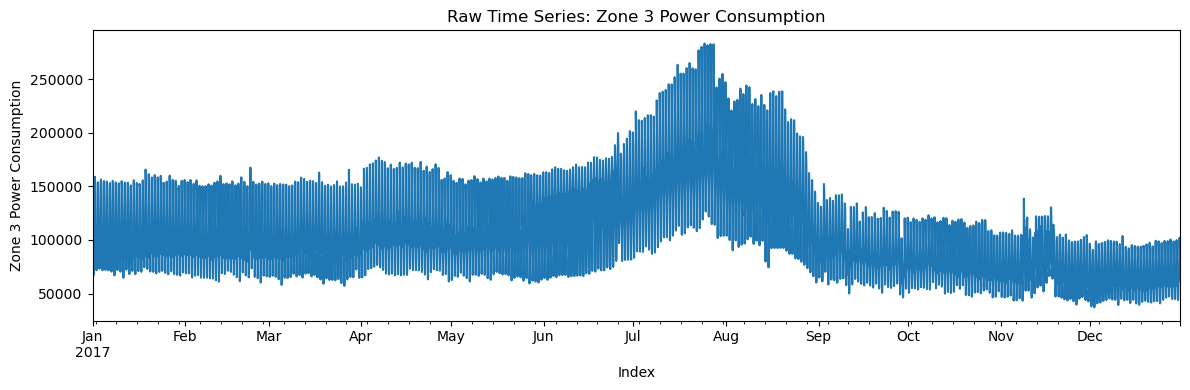


--- Classical Seasonal Decomposition for 'Zone 3 Power Consumption' (period=168) ---


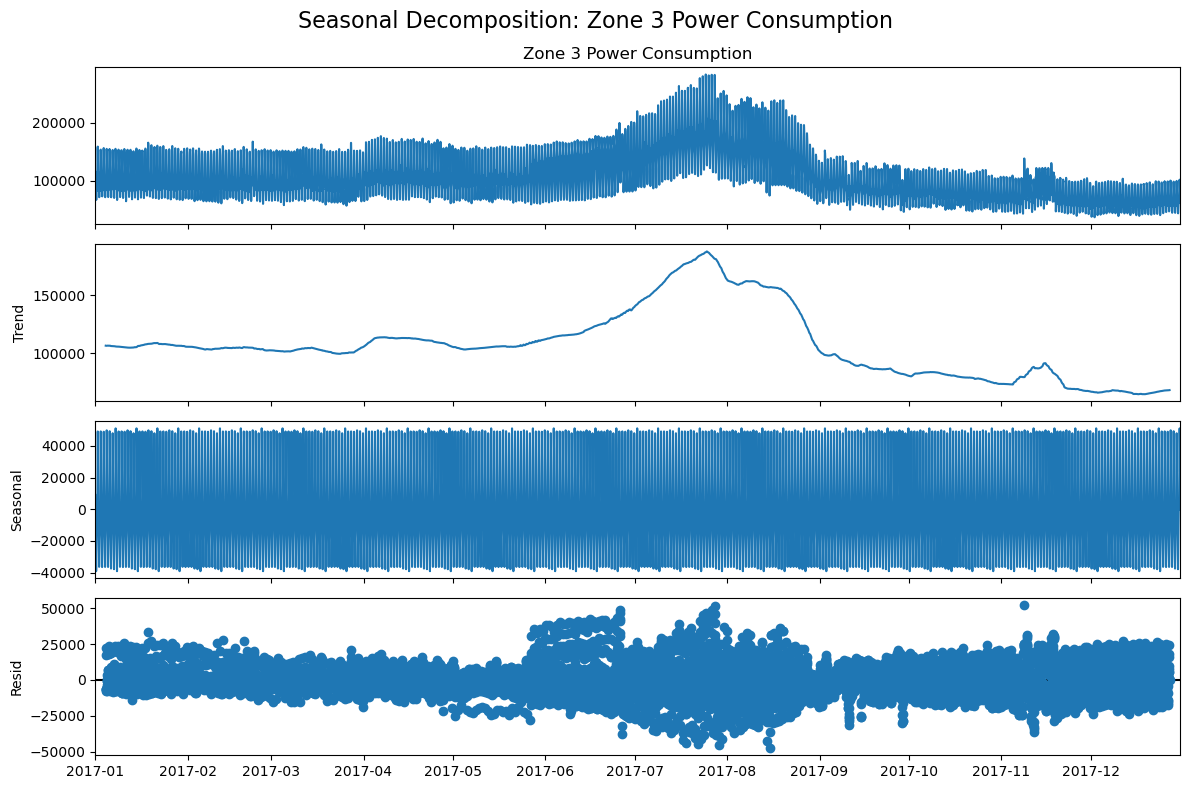


--- Stationarity Tests for 'Zone 3 Power Consumption' ---


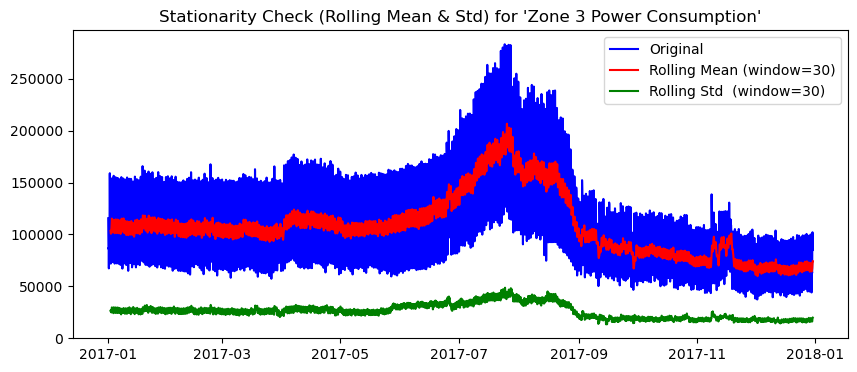

----- Augmented Dickey–Fuller Test (Null: unit root, non-stationary) -----
ADF Statistic   : -1.261180
p-value         : 0.646740
Used lag        : 26
Number of obs   : 8709
Critical Values :
    1%: -3.431
    5%: -2.862
    10%: -2.567
=> ADF p-value >= 0.05 → fail to reject null. 'Zone 3 Power Consumption' may be non-stationary by ADF.

----- KPSS Test (Null: stationary) -----
KPSS Statistic : 3.994698
p-value         : 0.010000
Used lags       : 50
Critical Values :
    10%: 0.347
    5%: 0.463
    2.5%: 0.574
    1%: 0.739
=> KPSS p-value < 0.05 → reject null. 'Zone 3 Power Consumption' is non-stationary by KPSS test.

----- Interpretation Summary -----
Both ADF and KPSS agree: 'Zone 3 Power Consumption' is non-stationary. Consider differencing or detrending.
----------------------------------------------------------------------

--- ACF & PACF for 'Zone 3 Power Consumption' ---


c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\tests.py:222: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




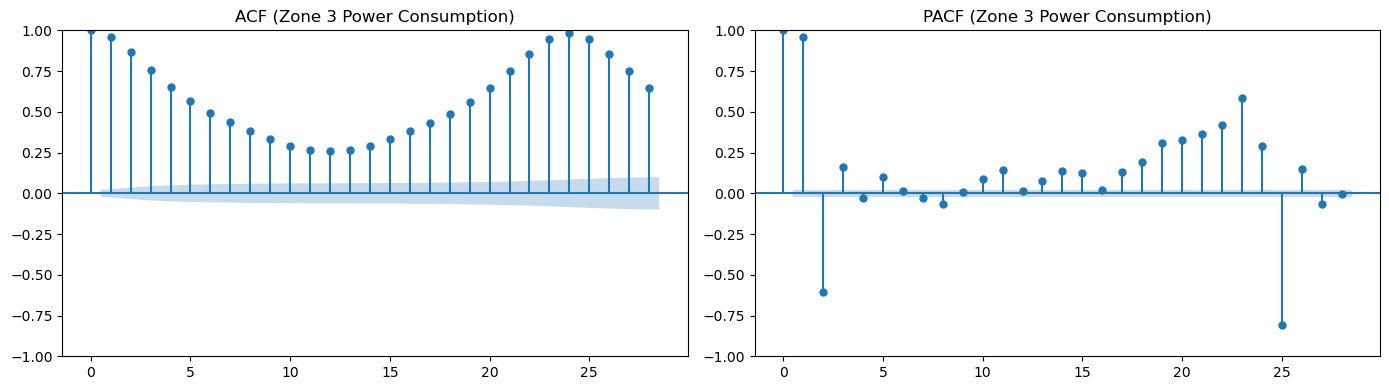


--- Summary Statistics for 'Zone 3 Power Consumption' ---
count      8736.000000
mean     107012.437310
std       39546.083934
min       37143.817526
25%       78890.821477
50%       98565.957850
75%      129590.686943
max      283342.594140
Name: Zone 3 Power Consumption, dtype: float64


--- Plotly Overlay Seasonality for 'Zone 3 Power Consumption' (block_length=168) ---



--- Plotly Average Seasonality for 'Zone 3 Power Consumption' (block_length=168) ---



--- Plotly Detrended Seasonality for 'Zone 3 Power Consumption' (block_length=168) ---


{'Zone 1 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b89bb18470>,
  'adf': None,
  'kpss': None,
  'summary': count      8736.000000
  mean     194069.823382
  std       42413.519258
  min       85974.683540
  25%      157757.710383
  50%      194053.820085
  75%      223908.013310
  max      311065.571590
  Name: Zone 1 Power Consumption, dtype: float64},
 'Zone 2 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b89dd2ef00>,
  'adf': None,
  'kpss': None,
  'summary': count      8736.000000
  mean     126255.054494
  std       30991.069215
  min       52115.682281
  25%      102101.410295
  50%      124723.376960
  75%      148065.654115
  max      217528.194300
  Name: Zone 2 Power Consumption, dtype: float64},
 'Zone 3 Power Consumption': {'decomposition': <statsmodels.tsa.seasonal.DecomposeResult at 0x1b89bce0470>,
  'adf': None,
  'kpss': None,
  'summary': count      8736.000000
  mean     107012.43731

In [49]:
ata.run_full_analysis(
    df=df_hourly.reset_index(),
    datetime_col="DateTime",                  # Replace with your actual timestamp column name
    target_cols=['Zone 1 Power Consumption',
       'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
    decomposition_period=168,    # e.g. use 7 if data is daily and you expect weekly seasonality
    adf_regression="c",        # ADF regression option
    kpss_regression="c",       # KPSS regression option
)


In [55]:
df_monthly = eda.aggregate_time_series(df, freq='M', how='mean')
df_monthly.head()

c:\Users\PRADEEP CHUDASAMA\OneDrive\Desktop\AI_ML Projects\AZ_Forecast\eda_tools.py:564: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Temperature   Humidity  Wind Speed  general diffuse flows  \
DateTime                                                                
2017-01-31    12.743092  68.294122    0.707927             103.343396   
2017-02-28    12.644443  66.551322    1.096494             125.768940   
2017-03-31    14.579907  71.100029    1.006189             181.090957   
2017-04-30    16.444463  75.242521    0.224269             159.399087   
2017-05-31    20.293564  68.712440    2.298271             273.666324   

            diffuse flows  Zone 1 Power Consumption  \
DateTime                                              
2017-01-31      68.687413              31032.493535   
2017-02-28      91.627936              30985.753632   
2017-03-31      93.983753              31155.165408   
2017-04-30      84.302805              31169.768210   
2017-05-31     123.048394              32396.009166   

            Zone 2  Power Consumption  Zone 3  Power Consumption  
DateTime                                                          
2017-01-31               19394.444717               17746.095349  
2017-02-28               18787.793096               17335.002154  
2017-03-31               18457.937484               16947.686004  
2017-04-30               17633.966395               18593.167677  
2017-05-31               19977.287859               17621.100953

In [58]:
eda.clean_column_names(df_monthly)

In [61]:
# ata.run_full_analysis(
#     df=df_monthly.reset_index(),
#     datetime_col="DateTime",                  # Replace with your actual timestamp column name
#     target_cols=['Zone 1 Power Consumption',
#        'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
#     decomposition_period=1,    # e.g. use 7 if data is daily and you expect weekly seasonality
#     adf_regression="c",        # ADF regression option
#     kpss_regression="c",       # KPSS regression option
# )